# image_samples.ipynb

Plots sample crop images.

Author: Connacher Murphy

In [1]:
# Import libraries
import os
import matplotlib.pyplot as plt
import cv2
from types import SimpleNamespace
from torch.utils.data import DataLoader

import pest_classification as pest

In [2]:
df = pest.df
crops = pest.crops
crop_descriptions = pest.crop_descriptions
path = pest.path

print(df)

print(df["crop_description"].unique())

        crop        set crop_description  \
0      Maize  train_set      leaf beetle   
1      Maize  train_set      leaf beetle   
2      Maize  train_set      leaf beetle   
3      Maize  train_set      leaf beetle   
4      Maize  train_set      leaf beetle   
...      ...        ...              ...   
24546  Maize   test_set       grasshoper   
24547  Maize   test_set       grasshoper   
24548  Maize   test_set       grasshoper   
24549  Maize   test_set       grasshoper   
24550  Maize   test_set       grasshoper   

                                                    file  label  
0      Maize/train_set/leaf beetle/8maize_train_leaf ...      0  
1      Maize/train_set/leaf beetle/697maize_train_lea...      0  
2      Maize/train_set/leaf beetle/2925maize_train_le...      0  
3      Maize/train_set/leaf beetle/1263maize_train_le...      0  
4      Maize/train_set/leaf beetle/2595maize_train_le...      0  
...                                                  ...    ...  
24546  Ma

Maize leaf beetle


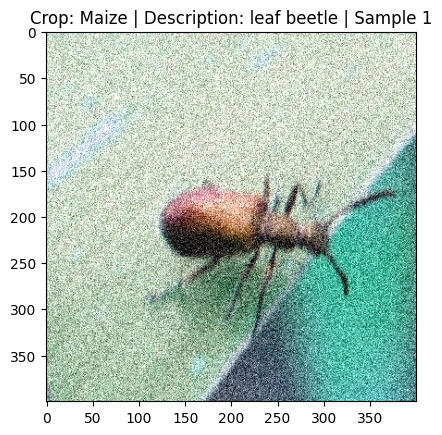

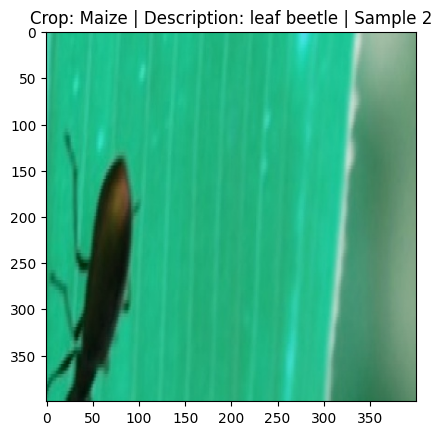

Maize healthy


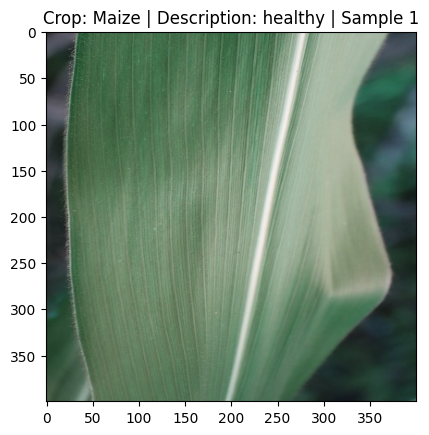

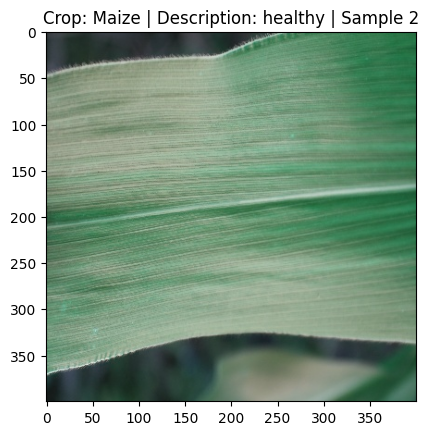

Maize fall armyworm


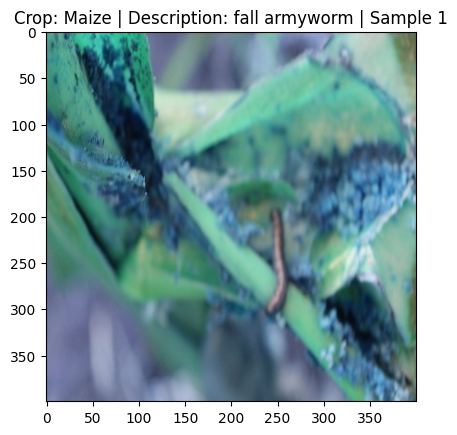

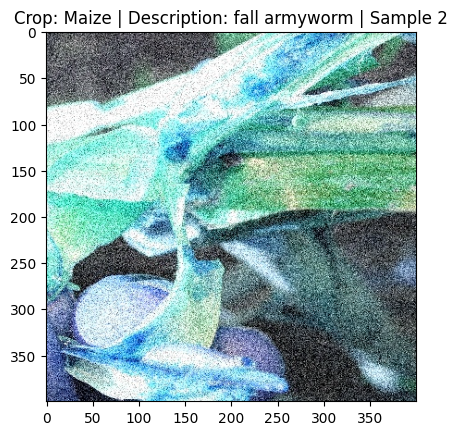

Maize leaf spot


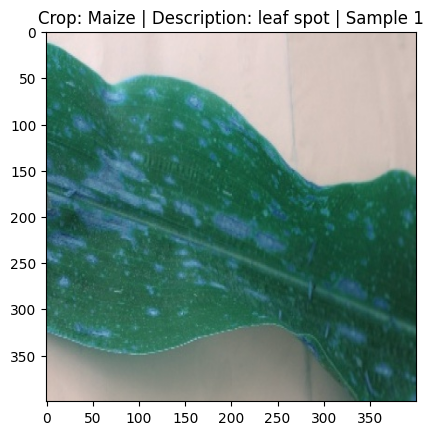

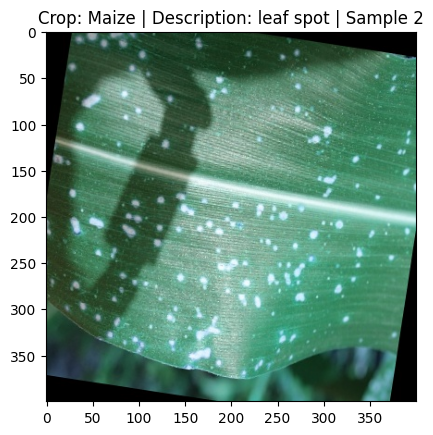

Maize leaf blight


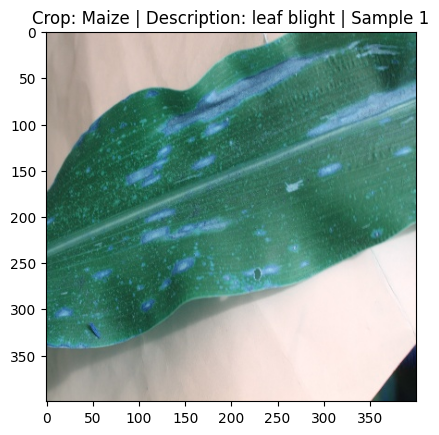

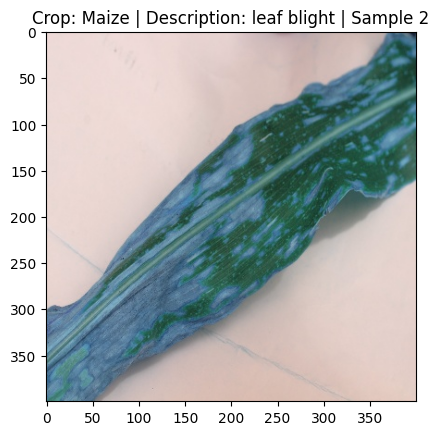

Maize streak virus


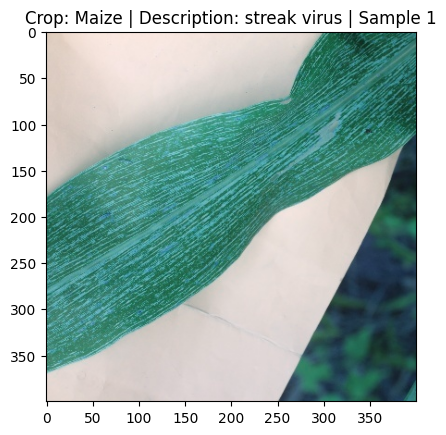

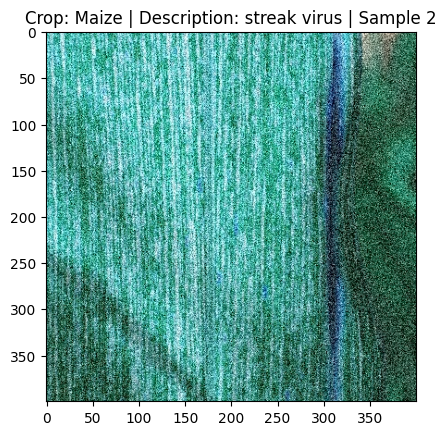

Maize grasshoper


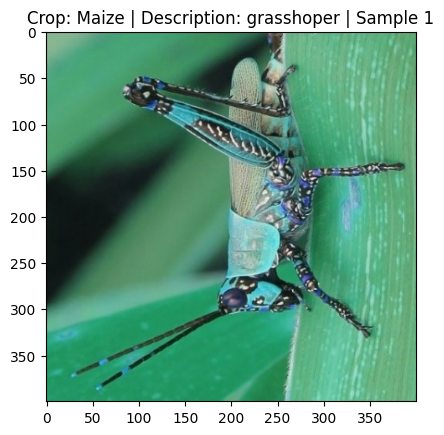

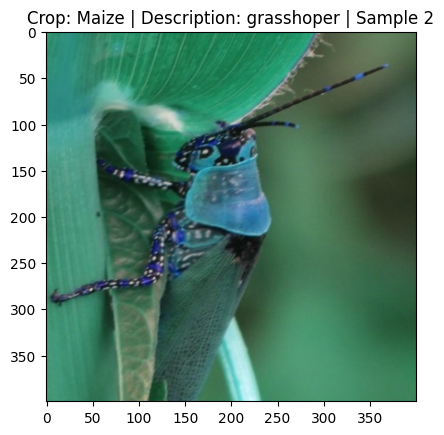

In [3]:
# Plot sample few images
for crop in crops:
    for crop_description in crop_descriptions[crop]:
        print(crop, crop_description)
        for i in range(2):
            img = cv2.imread(
                os.path.join(
                    path,
                    df[
                        (df["crop"] == crop)
                        & (df["set"] == "train_set")
                        & (df["crop_description"] == crop_description)
                    ]["file"].iloc[i],
                )
            )

            plt.imshow(img)
            plt.title(f"Crop: {crop} | Description: {crop_description} | Sample {i + 1}")
            plt.show()

In [4]:
# Try the data loader
config = SimpleNamespace(**{})

config.batch_size = 32

config.image_dir = os.path.expanduser("~/data/ccmt/CCMT Dataset-Augmented")
config.image_size = 256

sample_dataset = pest.AugmentedCCMT(config, df)

sample_dataloader = DataLoader(
    sample_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    num_workers=0,
)

In [5]:
for (image_batch, label_batch) in sample_dataloader:
    print(image_batch.shape)
    print(label_batch.shape)
    break

torch.Size([32, 3, 256, 256])
torch.Size([32])
